# Optimizing Facebook Ad Campaigns Using Random Forest Regression (RFR): Insights and Predictions 

## Importing libraries

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm

## Importing dataset into 'data' data frame

In [152]:
data = pd.read_csv ('facebook campaign data.csv')
data.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


## Data cleaning and validation process

In [153]:
#Checking for null values
data.isnull().sum()

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

In [154]:
##Dropping null values
data.dropna(inplace=True)

In [155]:
#renaming the campaigns for readability
data['campaign_id'].replace ({'916': 'campaign A'}, inplace=True)
data['campaign_id'].replace ({'936': 'campaign B'}, inplace=True)
data['campaign_id'].replace ({'1178': 'campaign C'}, inplace=True)
#data['campaign_id'].fillna(data['campaign_id'].mean())

In [156]:
#checking unique values in Age
data ['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [157]:
#Checking unique values in gender and all other rows
data ['gender'].unique()

array(['M', 'F'], dtype=object)

In [158]:
#checking unique values in campaign_id
data.campaign_id.unique()

array(['campaign A', 'campaign B', 'campaign C'], dtype=object)

In [159]:
#checking unique values in impressions
data ['impressions'].unique()

array([7.350000e+03, 1.786100e+04, 6.930000e+02, 4.259000e+03,
       4.133000e+03, 1.915000e+03, 1.561500e+04, 1.095100e+04,
       2.355000e+03, 9.502000e+03, 1.224000e+03, 7.350000e+02,
       5.117000e+03, 5.120000e+03, 1.466900e+04, 1.241000e+03,
       2.305000e+03, 1.024000e+03, 4.627000e+03, 2.102600e+04,
       1.422000e+03, 7.132000e+03, 1.219000e+04, 1.219300e+04,
       3.332000e+03, 5.590000e+02, 7.440000e+03, 1.911300e+04,
       1.097600e+04, 2.861000e+03, 1.398000e+03, 2.381700e+04,
       4.722400e+04, 2.283000e+03, 2.182000e+03, 2.654000e+03,
       5.766500e+04, 3.091000e+03, 5.014000e+03, 3.872600e+04,
       1.473000e+03, 1.186000e+03, 5.369000e+03, 2.222100e+04,
       1.185000e+03, 1.301900e+04, 2.508000e+03, 5.864000e+03,
       2.783000e+03, 3.812000e+03, 1.119900e+04, 2.920000e+02,
       1.757200e+04, 1.448000e+03, 1.772000e+03, 1.332900e+04,
       1.365900e+04, 7.390000e+02, 6.050000e+02, 1.030000e+03,
       5.374000e+03, 7.900000e+02, 9.620000e+02, 4.4230

In [160]:
#checking unique values in ad_id
data ['ad_id'].unique()

array([ 708746,  708749,  708771,  708815,  708818,  708820,  708889,
        708895,  708953,  708958,  708979,  709023,  709038,  709040,
        709059,  709105,  709115,  709124,  709179,  709183,  709320,
        709323,  709326,  709327,  709328,  709455,  709544,  709614,
        709756,  709761,  709899,  709901,  710045,  710088,  710360,
        710477,  710480,  710571,  710617,  710623,  710628,  710682,
        710763,  710836,  710867,  710880,  710961,  710968,  711217,
        711623,  711764,  711785,  711877,  712052,  734209,  734210,
        734215,  734243,  734266,  734272,  734290,  734313,  734314,
        734352,  734361,  734381,  734399,  734418,  734421,  734427,
        734433,  734582,  734605,  734660,  734666,  734726,  734737,
        734785,  734794,  734796,  734800,  734803,  734852,  734854,
        734856,  734866,  734881,  734901,  734903,  734925,  734939,
        734968,  734999,  735014,  735032,  735033,  735043,  735048,
        735065,  735

In [161]:
#checking unique values in 'reporting_start'
data ['reporting_start'].unique()

array(['17/08/2017', '30/08/2017', '29/08/2017', '18/08/2017',
       '19/08/2017', '27/08/2017', '26/08/2017', '25/08/2017',
       '28/08/2017', '20/08/2017', '21/08/2017', '24/08/2017',
       '23/08/2017', '22/08/2017'], dtype=object)

In [162]:
#checking unique values in 'reporting_end'
data ['reporting_end'].unique()

array(['17/08/2017', '30/08/2017', '29/08/2017', '18/08/2017',
       '19/08/2017', '27/08/2017', '26/08/2017', '25/08/2017',
       '28/08/2017', '20/08/2017', '21/08/2017', '24/08/2017',
       '23/08/2017', '22/08/2017'], dtype=object)

In [163]:
#checking unique values in 'campaign_id'
data ['campaign_id'].unique()

array(['campaign A', 'campaign B', 'campaign C'], dtype=object)

In [164]:
#checking unique values in 'interest1'
data ['interest1'].unique()

array([15, 16, 20, 28, 29, 27, 31,  7, 30, 24, 21, 32, 18, 63, 65, 25, 10,
       19, 26, 36, 23, 64, 22,  2, 66], dtype=int64)

In [165]:
#checking unique values in 'interest2'
data ['interest2'].unique()

array([17, 19, 25, 32, 33, 30, 16, 20, 31, 37,  8, 26, 34, 21, 22, 12, 18,
       24, 64, 70, 29, 67, 13, 23, 38, 11, 27, 35, 28, 69, 40, 65, 10, 66,
        6, 36, 68,  7, 14, 15, 71,  9,  3,  4, 41, 42,  5, 39, 72],
      dtype=int64)

In [166]:
#checking unique values in 'interest3'
data ['interest3'].unique()

array([17, 21, 22, 32, 30, 18, 31, 34,  8, 23, 33, 20, 19, 10, 27, 24, 38,
       16, 68, 26, 29, 11, 65, 14, 13, 35, 28, 41, 67, 12, 40, 69, 25, 66,
       36,  6, 64,  7,  3, 15, 70,  9, 71, 37, 39, 42,  4,  5, 72],
      dtype=int64)

In [167]:
#checking unique values in 'clicks'
data ['clicks'].unique()

array([  1,   2,   0,   3,   7,   4,  12,  14,   5,  13,  24,   6,  23,
        20,  28,  10,   9,  36,  15, 116,  27,  38,   8,  21,  19,  25,
        34, 114,  48,  11,  16,  55,  33,  56,  26,  41,  49,  29, 141,
        67,  50,  86, 123, 340,  30, 202,  95, 120,  89,  54,  46,  58,
        22, 152,  35,  31,  80, 145,  53, 206, 159,  65, 128,  32,  39,
        43,  66, 142,  51, 100, 118,  68,  37,  42,  40,  18,  59, 103,
       233,  52, 125,  84, 147,  63,  64,  91,  69, 205,  82,  71,  81,
        75,  85,  44,  77, 221], dtype=int64)

In [168]:
#checking unique values in 'total_conversio'
data ['total_conversion'].unique()

array([ 2.,  1.,  4.,  3.,  0.,  5., 28., 13., 11., 24., 60.,  7., 40.,
       26.,  6., 20.,  9., 23., 22., 31., 10.,  8., 17., 15.])

In [169]:
# checking outliers in impressions
data.loc[data['impressions'] > 1500000]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
525,1121100,29/08/2017,29/08/2017,campaign C,144532,30-34,M,15,20,17,3052003.0,340,639.949998,60.0,17.0
528,1121104,25/08/2017,25/08/2017,campaign C,144533,30-34,M,16,20,20,2080666.0,202,360.150001,40.0,21.0
706,1121452,25/08/2017,25/08/2017,campaign C,144599,40-44,M,16,21,22,1663441.0,205,359.470000,17.0,6.0


In [170]:
#dropping outliers in impressions
data.drop([525,528,706],inplace=True)

In [171]:
# Re-checking for null values in dataset
missing_val = data.isnull().sum()
missing_val

ad_id                  0
reporting_start        0
reporting_end          0
campaign_id            0
fb_campaign_id         0
age                    0
gender                 0
interest1              0
interest2              0
interest3              0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

### Data Analysis

In [172]:
#creating total conversation rate (%)
tcr = ((data['total_conversion'] / data['impressions']) * 100)
data['tcr'] = tcr

In [173]:
#creating approved conversation rate (%)
acr = ((data['approved_conversion']/data['impressions'])*100)
data['acr'] = acr

In [174]:
#creating overall conversion rate
OTCR = (data.total_conversion.sum()/data.impressions.sum())*100
OTCR

0.0021305824502083023

In [175]:
#Crosschecking the new table
data.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,tcr,acr
0,708746,17/08/2017,17/08/2017,campaign A,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0.027211,0.013605
1,708749,17/08/2017,17/08/2017,campaign A,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.011198,0.000000
2,708771,17/08/2017,17/08/2017,campaign A,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0.144300,0.000000
3,708815,30/08/2017,30/08/2017,campaign A,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0.023480,0.000000
4,708818,17/08/2017,17/08/2017,campaign A,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0.024195,0.024195


In [176]:
#Statistical output
data.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,tcr,acr
count,7.580000e+02,758.000000,758.000000,758.000000,7.580000e+02,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,8.947461e+05,25.511873,29.011873,29.021108,9.461409e+04,14.415567,24.090594,2.015831,0.713720,0.037155,0.015152
std,1.668187e+05,15.527254,15.628907,15.624121,2.023476e+05,28.998658,50.374199,3.153453,1.351587,0.085004,0.068990
min,7.087460e+05,2.000000,3.000000,3.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.480552e+05,16.000000,19.000000,19.250000,3.143750e+03,0.000000,0.000000,1.000000,0.000000,0.002099,0.000000
50%,7.811605e+05,22.000000,26.000000,26.000000,1.218800e+04,3.000000,3.490000,1.000000,0.000000,0.008929,0.000000
75%,1.121184e+06,29.000000,33.000000,33.000000,8.508725e+04,14.000000,22.202500,2.000000,1.000000,0.032965,0.003106
max,1.121593e+06,66.000000,72.000000,72.000000,1.447755e+06,233.000000,420.579998,31.000000,14.000000,1.149425,1.149425


In [177]:
#creating a variable to sum each categories
print('Sum for each categories')
camp_stat = data.groupby(['campaign_id'])[['spent', 'impressions', 'clicks', 'total_conversion', 'approved_conversion']].sum()
print(camp_stat)

Sum for each categories
                    spent  impressions  clicks  total_conversion  \
campaign_id                                                        
campaign A     149.710001     482925.0     113              58.0   
campaign B    2893.369999    8128187.0    1984             537.0   
campaign C   15217.589998   63106366.0    8830             933.0   

             approved_conversion  
campaign_id                       
campaign A                  24.0  
campaign B                 183.0  
campaign C                 334.0  


In [178]:
#calculating conversation rates and cost
camp_stat['tcr'] = round((camp_stat['total_conversion']/camp_stat['impressions'])*100,3)
camp_stat['acr'] = round((camp_stat['approved_conversion']/camp_stat['impressions'])*100,3)
camp_stat['t_conv_cost'] = round(camp_stat['spent']/camp_stat['total_conversion'],2)
camp_stat['a_conv_cost'] = round(camp_stat['spent']/camp_stat['approved_conversion'],2)

camp_stat

,spent,impressions,clicks,total_conversion,approved_conversion,tcr,acr,t_conv_cost,a_conv_cost
campaign_id,,,,,,,,,
campaign A,149.710001,482925.0,113,58.0,24.0,0.012,0.005,2.58,6.24
campaign B,2893.369999,8128187.0,1984,537.0,183.0,0.007,0.002,5.39,15.81
campaign C,15217.589998,63106366.0,8830,933.0,334.0,0.001,0.001,16.31,45.56


In [179]:
#calculating conversation rates and cost
camp_stat['tcr'] = round((camp_stat['total_conversion']/camp_stat['impressions'])*100,3)
camp_stat['acr'] = round((camp_stat['approved_conversion']/camp_stat['impressions'])*100,3)
camp_stat['t_conv_cost / inquiries'] = round(camp_stat['spent']/camp_stat['total_conversion'],2)
camp_stat['a_conv_cost / sale'] = round(camp_stat['spent']/camp_stat['approved_conversion'],2)

print(camp_stat[['spent', 't_conv_cost / inquiries', 'a_conv_cost / sale', 'acr']])

                    spent  t_conv_cost / inquiries  a_conv_cost / sale    acr
campaign_id                                                                  
campaign A     149.710001                     2.58                6.24  0.005
campaign B    2893.369999                     5.39               15.81  0.002
campaign C   15217.589998                    16.31               45.56  0.001


In [180]:
# Printing sum for each Age
print('sum for each Age')
age_stat = data.groupby('age')[['spent', 'clicks', 'impressions', 'total_conversion', 'approved_conversion']].sum()
age_stat['tcr'] = round((age_stat['total_conversion']/age_stat['impressions'])*100,3)
age_stat['acr'] = round((age_stat['approved_conversion']/age_stat['impressions'])*100,3)

age_stat

sum for each Age


,spent,clicks,impressions,total_conversion,approved_conversion,tcr,acr
age,,,,,,,
30-34,6693.119994,3891,30545924.0,790.0,290.0,0.003,0.001
35-39,5145.520004,3005,20165377.0,357.0,129.0,0.002,0.001
40-44,3978.159999,2455,14218148.0,218.0,76.0,0.002,0.001
45-49,2443.870000,1576,6788029.0,163.0,46.0,0.002,0.001


In [181]:
# Calculating the mean for each columns grouped by age.
data.groupby('age')[['spent', 'clicks', 'impressions', 'total_conversion', 'approved_conversion']].mean()

,spent,clicks,impressions,total_conversion,approved_conversion
age,,,,,
30-34,20.594215,11.972308,93987.458462,2.430769,0.892308
35-39,28.586222,16.694444,112029.872222,1.983333,0.716667
40-44,28.827246,17.789855,103030.057971,1.579710,0.550725
45-49,21.251043,13.704348,59026.339130,1.417391,0.400000


In [182]:
# Calculating the mean of 'spent' for each age group
data.groupby('age')[['spent']].mean()

,spent
age,
30-34,20.594215
35-39,28.586222
40-44,28.827246
45-49,21.251043


In [183]:
#calculating the upper limit (outlier) by finding the mean and standard deviation of total conversion rate (tcr)
mean_tcr = (data['total_conversion'] / data['impressions']).mean()
std_dev_tcr = (data['total_conversion'] / data['impressions']).std()
upper_tcr = mean_tcr + (3 * std_dev_tcr)
print (upper_tcr)

0.0029216678257572514


In [184]:
#extract rows where total conversion rate (tcr) is greater than the upper limit
ext_ad = data[data['tcr']>upper_tcr]
ext_ad

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,tcr,acr
0,708746,17/08/2017,17/08/2017,campaign A,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0.027211,0.013605
1,708749,17/08/2017,17/08/2017,campaign A,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.011198,0.000000
2,708771,17/08/2017,17/08/2017,campaign A,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0.144300,0.000000
3,708815,30/08/2017,30/08/2017,campaign A,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0.023480,0.000000
4,708818,17/08/2017,17/08/2017,campaign A,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0.024195,0.024195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,1121477,21/08/2017,21/08/2017,campaign C,144603,40-44,M,21,27,22,7073.0,0,0.00,1.0,0.0,0.014138,0.000000
729,1121510,19/08/2017,19/08/2017,campaign C,144608,40-44,M,26,30,31,31202.0,5,6.73,1.0,0.0,0.003205,0.000000
752,1121572,20/08/2017,20/08/2017,campaign C,144619,40-44,M,2,6,3,32574.0,5,7.48,1.0,0.0,0.003070,0.000000
755,1121584,20/08/2017,20/08/2017,campaign C,144621,40-44,M,66,67,67,33154.0,5,7.88,1.0,1.0,0.003016,0.003016


In [185]:
#getting the shape of the data
ext_ad.shape

(519, 17)

In [186]:
#creating performance index  based on total conversion rate
data['performance'] = data['tcr'].apply(lambda x: 'top_performance' if(x> upper_tcr) else 'average_performance')

In [187]:
# showing statistics for total conversion rate based on 'performance' group
data.groupby('performance')['tcr'].describe()

,count,mean,std,min,25%,50%,75%,max
performance,,,,,,,,
average_performance,239.0,0.001405,0.000706,0.00000,0.000860,0.001285,0.001968,0.002921
top_performance,519.0,0.053617,0.098479,0.00293,0.008369,0.020105,0.054738,1.149425


In [188]:
# Characteristics of Top Performing Ads
print(f'campaign_id \n{ext_ad.campaign_id.value_counts()}\ngender\n{ext_ad.gender.value_counts()}\nage\n{ext_ad.age.value_counts()}')

campaign_id 
campaign B    419
campaign A     51
campaign C     49
Name: campaign_id, dtype: int64
gender
M    286
F    233
Name: gender, dtype: int64
age
30-34    247
35-39    108
45-49     85
40-44     79
Name: age, dtype: int64


In [189]:
#Chisquare to show relationship between gender and performance
result, summary = rp.crosstab(data['gender'], data['performance'], prop = 'col', test = 'chi-square')

In [190]:
result

performance                        
performance average_performance top_performance     All
gender                                                 
F                         17.57           44.89   36.28
M                         82.43           55.11   63.72
All                      100.00          100.00  100.00

### Data visualisation

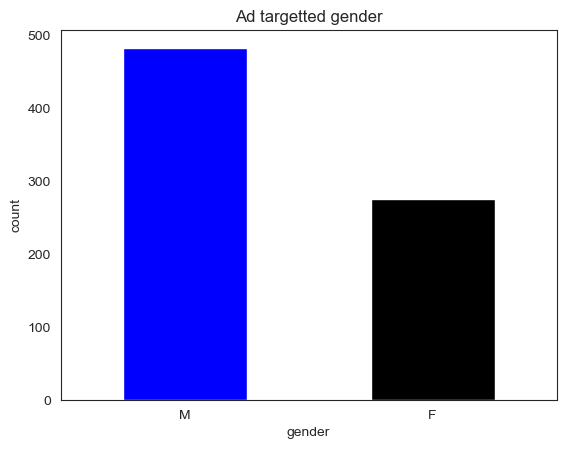

number of male = 483
number of females = 275
total =  758


In [191]:
#Using matplotlib to plot gender
gen_cnt = data.gender.value_counts()
gen_cnt.plot(kind='bar', color=['blue', 'black','grey']) ##color not showing
plt.xticks(rotation=0)
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Ad targetted gender')
plt.show()

#Summary of cleaned gender
no_of_male = (data['gender']=='M').sum()
print ('number of male =', no_of_male)

no_of_fem = (data['gender']=='F').sum()
print ('number of females =', no_of_fem)

total = (no_of_male + no_of_fem)
print ('total = ', total)

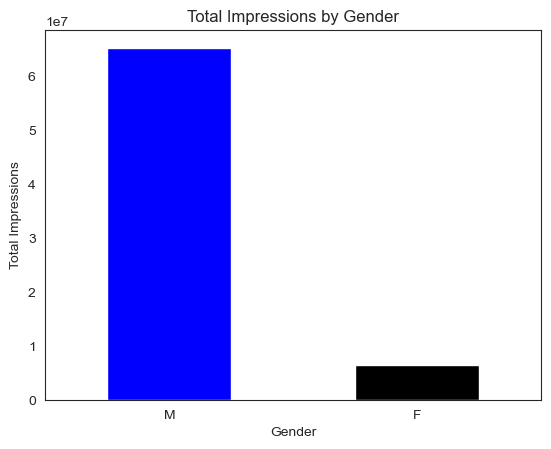

gender
M    65230191.0
F     6487287.0
Name: impressions, dtype: float64


In [192]:
impressions_by_gender = data.groupby('gender')['impressions'].sum()

# Reindex the result to ensure 'M' comes before 'F'
impressions_by_gender = impressions_by_gender.reindex(['M', 'F'])

# Plot the bar chart with the male gender first
impressions_by_gender.plot(kind='bar', color=['blue', 'black'])
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Total Impressions')
plt.title('Total Impressions by Gender')
plt.show()

# Print the DataFrame
print(impressions_by_gender)

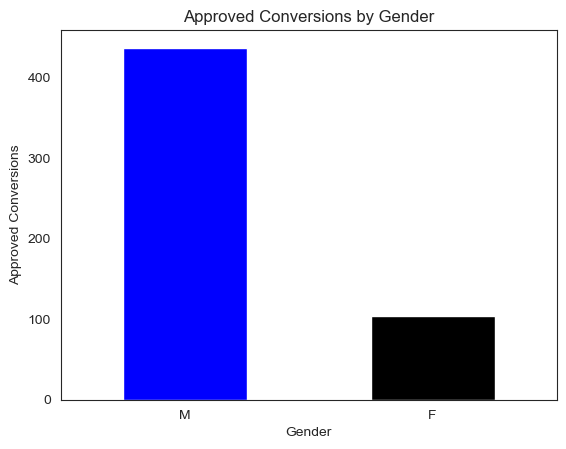

In [193]:
approved_conversions_by_gender = data.groupby('gender')['approved_conversion'].sum()

# Reindex the result to ensure 'M' comes before 'F'
approved_conversions_by_gender = approved_conversions_by_gender.reindex(['M', 'F'])

# Plot the bar chart with the male gender first
approved_conversions_by_gender.plot(kind='bar', color=['blue', 'black'])
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Approved Conversions')
plt.title('Approved Conversions by Gender')
plt.show()



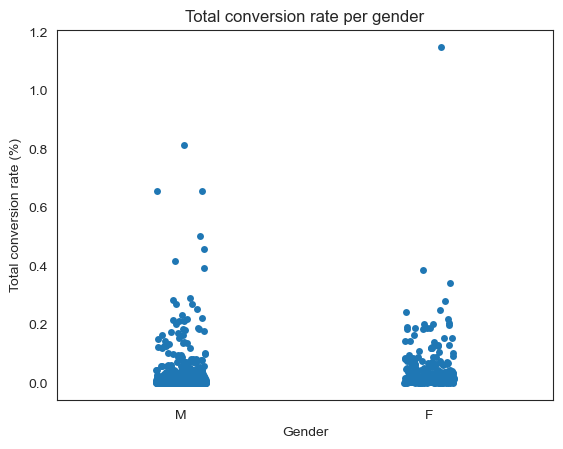

In [194]:
#stripplot showing total conversion rate
sns.stripplot(x= 'gender', y = 'tcr', data = data)
plt.xlabel('Gender')
plt.ylabel('Total conversion rate (%)')
plt.title('Total conversion rate per gender')
plt.show()

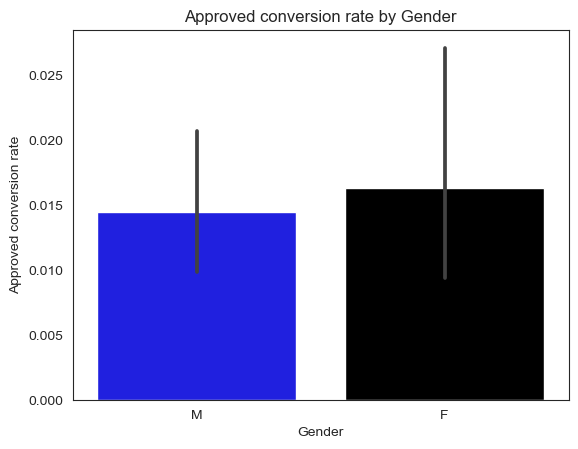

In [195]:
#a bar plot showing approved converssation rate based on gender


sns.barplot(x='gender', y='acr', data=data, palette=['blue', 'black'])
plt.title('Approved conversion rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Approved conversion rate')
plt.show()

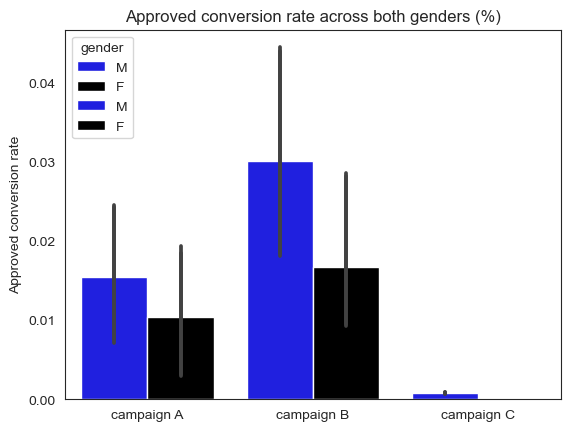

In [196]:
#a bar plot based on gender
sns.set_style("white")
sns.barplot(x="campaign_id", y="acr", hue= "gender" , data=data, palette=['blue', 'black'])
sns.barplot(x="campaign_id", y="acr", hue= "gender" , data=data, palette=['blue', 'black'])
plt.xlabel('')
plt.ylabel('Approved conversion rate')
plt.title('Approved conversion rate across both genders (%)')
plt.show()


Text(0.5, 1.0, 'Ad Targetted Age')

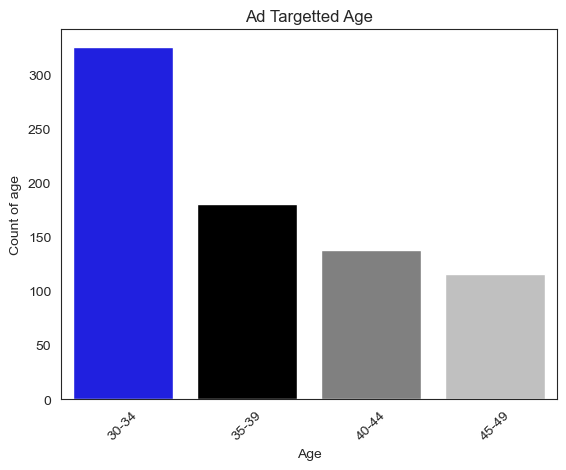

In [197]:
#using seaborn to plot age
sns.countplot(x='age', data=data, palette=['blue', 'black', 'grey', 'silver'])
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Count of age')
plt.title('Ad Targetted Age')

Text(0, 0.5, 'Impressions')

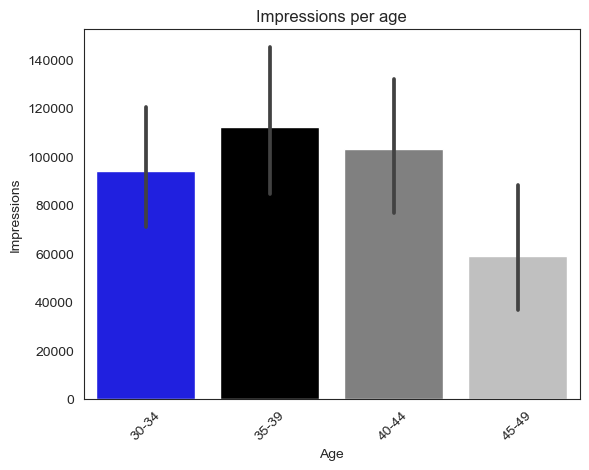

In [198]:
#Barplot to show impressions versus Age
sns.barplot(x= 'age', y = 'impressions', data = data, palette=['blue', 'black', 'grey', 'silver'])
plt.xticks(rotation=45)
plt.title('Impressions per age')
plt.xlabel('Age')
plt.ylabel('Impressions')

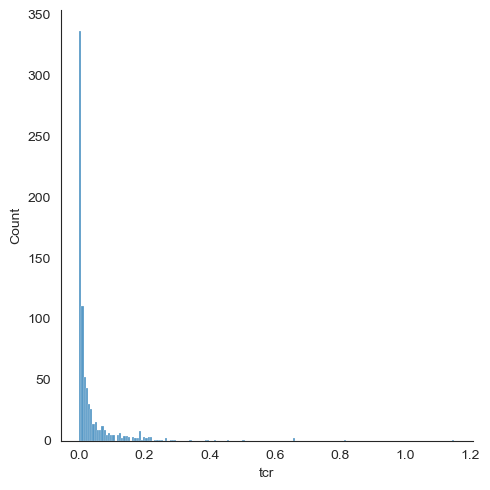

In [199]:
#distribution plot to show total conversion rate
sns.displot(data.tcr)

Text(0, 0.5, 'Total conversion rate (%)')

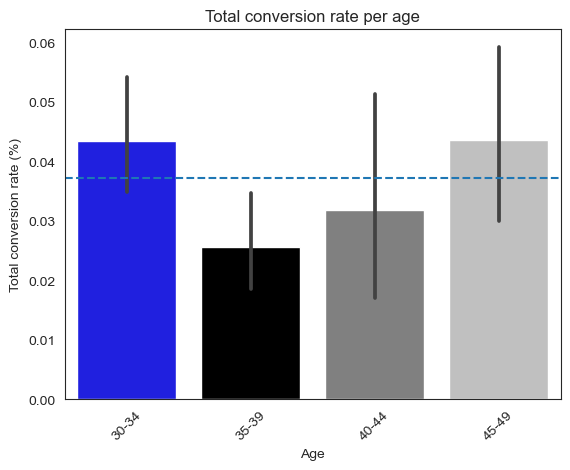

In [200]:
#barplot showin age versus total conversion rate
sns.barplot(x= 'age', y = 'tcr', data = data, palette=['blue', 'black', 'grey', 'silver'])
plt.axhline(y = data['tcr'].mean(), linestyle = '--')
plt.xticks(rotation=45)
plt.title('Total conversion rate per age')
plt.xlabel('Age')
plt.ylabel('Total conversion rate (%)')

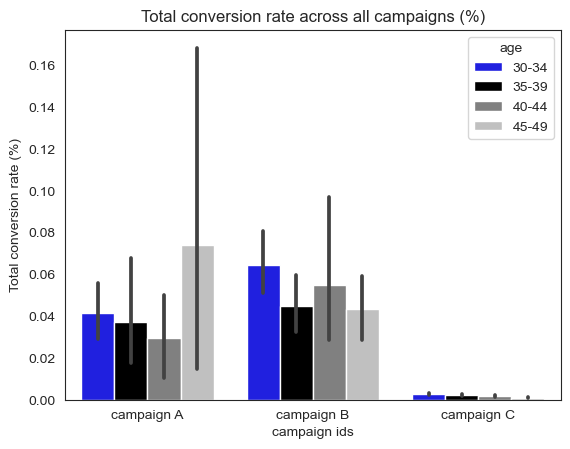

In [201]:
#barplot showing Campaign id versus Total conversion rate
sns.barplot(x= 'campaign_id', y = 'tcr', hue = 'age', data = data, palette=['blue', 'black', 'grey', 'silver'])
plt.xlabel('campaign ids')
plt.ylabel('Total conversion rate (%)')
plt.title('Total conversion rate across all campaigns (%)')
plt.show()

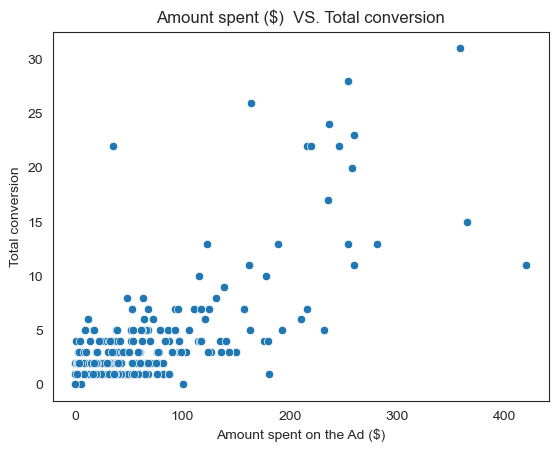

In [202]:
#Scatter plot of spent vs total conversion rate
sns.scatterplot(x = 'spent', y = "total_conversion", data=data)
plt.xticks(rotation=0)
plt.xlabel('Amount spent on the Ad ($)')
plt.ylabel('Total conversion')
plt.title('Amount spent ($)  VS. Total conversion')
plt.show()

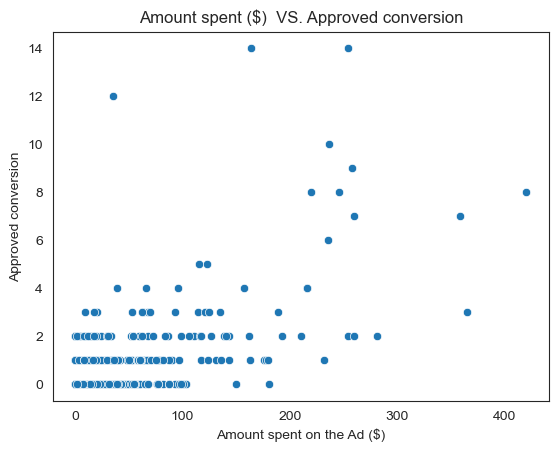

In [203]:
#scatter plot showing spent vs. approved conversion
sns.scatterplot(x = 'spent', y = "approved_conversion", data=data)
plt.xticks(rotation=0)
plt.xlabel('Amount spent on the Ad ($)')
plt.ylabel('Approved conversion')
plt.title('Amount spent ($)  VS. Approved conversion')
plt.show()

campaign_id
campaign A      149.710001
campaign B     2893.369999
campaign C    15217.589998
Name: spent, dtype: float64


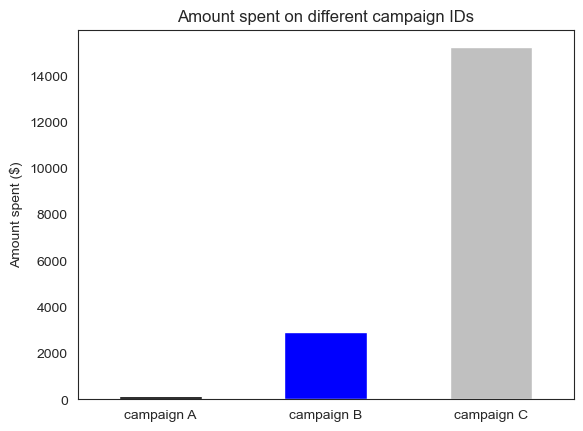

In [204]:
#plotting amount spent on campaign
spent=(data.groupby(['campaign_id'])).spent.sum()
print (spent)
spent.plot(kind='bar', color=['black', 'blue','silver'])
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Amount spent ($)')
plt.title('Amount spent on different campaign IDs')
plt.show()

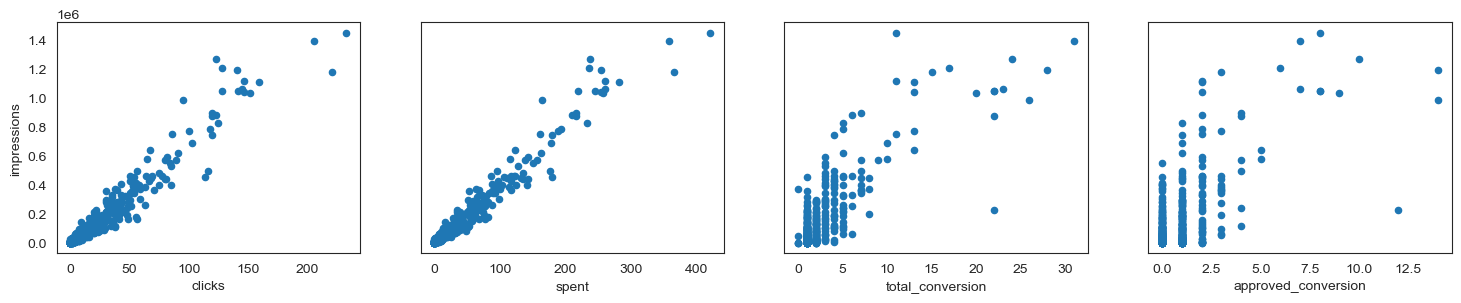

In [205]:
#Scatter plots of impressions against other variables
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 3))
for i, j in enumerate(['clicks', 'spent', 'total_conversion', 'approved_conversion']):
    data.plot(kind='scatter', x=j, y='impressions', ax=axs[i])
plt.show()

campaign_id
campaign A     24.0
campaign B    183.0
campaign C    334.0
Name: approved_conversion, dtype: float64


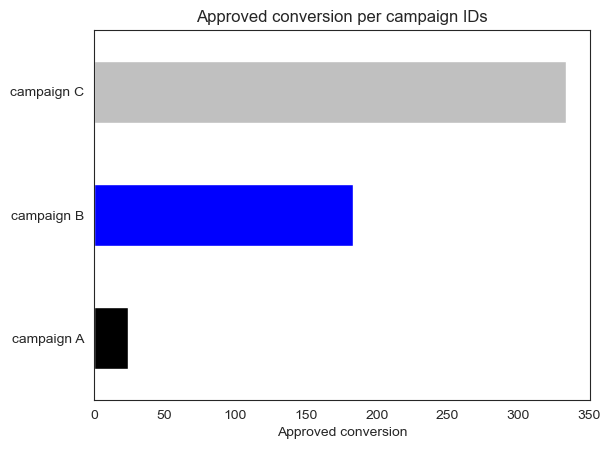

In [206]:
#Phorizontal bar chart to show approved conversion rate
approved_conversion = data.groupby('campaign_id')['approved_conversion'].sum()
print(approved_conversion)

approved_conversion.plot(kind='barh', color=['black', 'blue', 'silver'])
plt.xticks(rotation=0)
plt.xlabel('Approved conversion')
plt.ylabel('')
plt.title('Approved conversion per campaign IDs')
plt.show()

Text(52.315972222222214, 0.5, '')

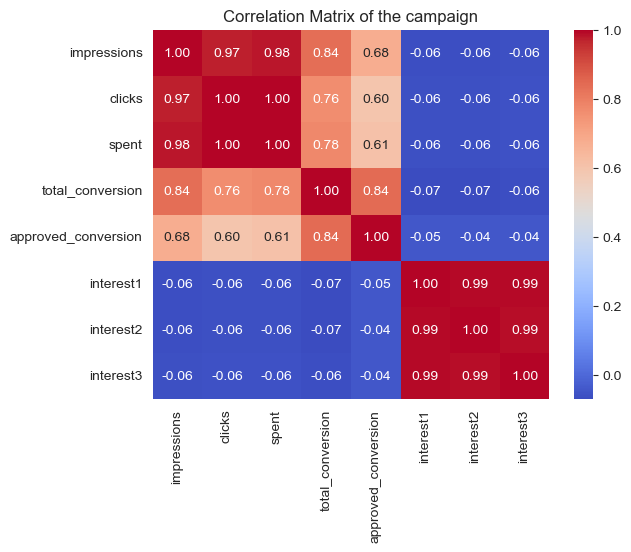

In [207]:
#Correlation Matrix
sns.heatmap(data[["impressions","clicks","spent","total_conversion","approved_conversion","interest1", 'interest2', 'interest3']].corr(),annot=True ,fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of the campaign')
plt.xlabel('')
plt.ylabel('')

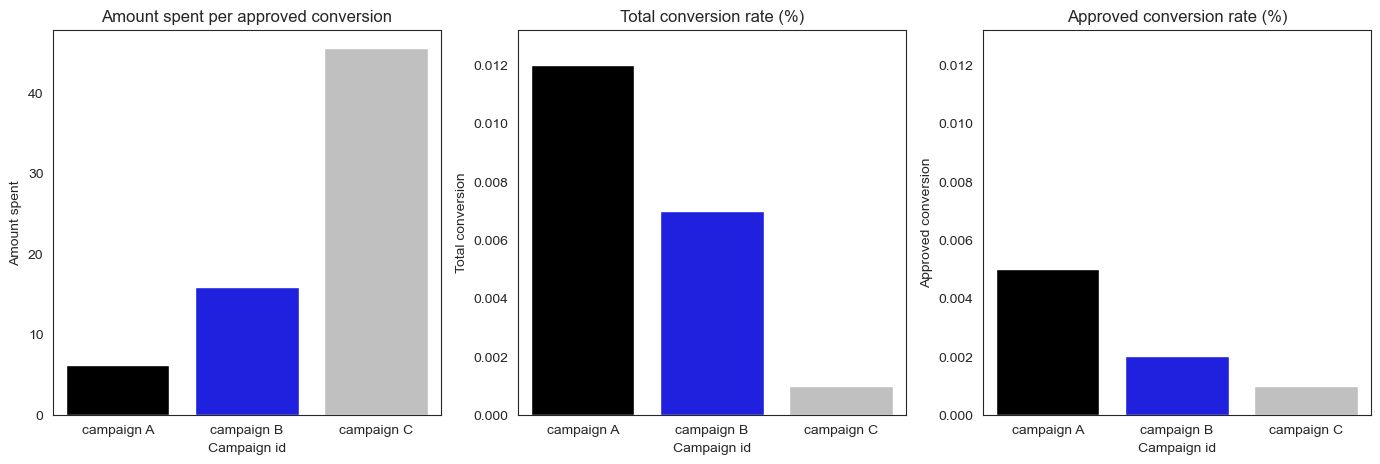

In [208]:
#barchart to plot anount spent per conversion, total conversion and approved conversion
colors = ['black', 'blue', 'silver']

fig, ax = plt.subplots(nrows = 1, ncols= 3, figsize = (17, 5))

sns.barplot(x = camp_stat.index, y = 'a_conv_cost', data = camp_stat, ax = ax[0], palette=colors)
sns.barplot(x = camp_stat.index, y = 'tcr', data = camp_stat, ax = ax[1], palette=colors )
sns.barplot(x = camp_stat.index, y = 'acr', data = camp_stat, ax = ax[2], palette=colors)
ax[0].set_title('Amount spent per approved conversion')
ax[1].set_title('Total conversion rate (%)')
ax[2].set_title('Approved conversion rate (%)')

ax[0].set_xlabel('Campaign id')
ax[1].set_xlabel('Campaign id')
ax[2].set_xlabel('Campaign id')
ax[0].set_ylabel('Amount spent')
ax[1].set_ylabel('Total conversion')
ax[2].set_ylabel('Approved conversion')

y_max = max(camp_stat[['tcr', 'acr']].max()) * 1.1

ax[1].set_ylim(0, y_max)
ax[2].set_ylim(0, y_max)

plt.show()

In [209]:
#converting the time data with pandas
data['reporting_end'] = pd.to_datetime(data['reporting_end'], dayfirst=True)

In [210]:
date_data = data.resample('D', on='reporting_end').sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_17520\2714462278.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  date_data = data.resample('D', on='reporting_end').sum()


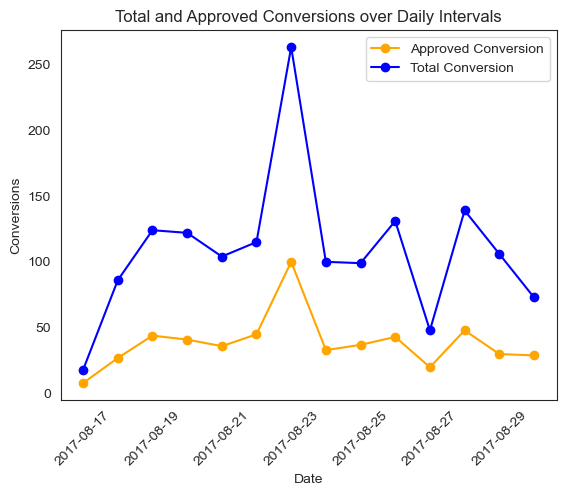

In [211]:
#TIme series data plotting
plt.plot(date_data.index, date_data['approved_conversion'], marker='o', linestyle='-', label='Approved Conversion', color = 'orange')
plt.plot(date_data.index, date_data['total_conversion'], marker='o', linestyle='-', label='Total Conversion', color = 'blue')

plt.title('Total and Approved Conversions over Daily Intervals')
plt.xlabel('Date')
plt.ylabel('Conversions')
plt.xticks(rotation=45)
plt.legend() 
plt.show()

## Using Random Forest Regression

#Encode label gender
from sklearn.preprocessing import LabelEncoder

#convert the gender column from text labels to numbers.
encoder=LabelEncoder()

#. fit means "learn the gender labels."
encoder.fit(data["gender"])

#encoder converts the gender column to numbers
data["gender"]=encoder.transform(data["gender"])

#encoding age

# Fit the encoder to the age data
encoder.fit(data['age'])

# Transform the age data to encoded values
data["age"]=encoder.transform(data['age'])

print(data['age'])

#replacing campaign id with original numeric values
data["campaign_id"].replace({"campaign A":916 ,"campaign B":936 ,"campaign C":1178}, inplace=True)
data.drop(['performance', 'reporting_start', 'reporting_end'], axis=1, inplace=True)

In [212]:
data.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,tcr,acr,performance
0,708746,17/08/2017,2017-08-17,campaign A,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0.027211,0.013605,top_performance
1,708749,17/08/2017,2017-08-17,campaign A,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.011198,0.000000,top_performance
2,708771,17/08/2017,2017-08-17,campaign A,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0.144300,0.000000,top_performance
3,708815,30/08/2017,2017-08-30,campaign A,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0.023480,0.000000,top_performance
4,708818,17/08/2017,2017-08-17,campaign A,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0.024195,0.024195,top_performance


#1 Drop the approved_conversion and total_conversion columns from the DataFrame
#2 Converts the remaining DataFrame to a NumPy array, creating the feature matrix X.
x=np.array(data.drop(labels=["approved_conversion","total_conversion"], axis=1))

#Converts this column to a NumPy array, creating the target vector y.
y=np.array(data ["total_conversion"])

x

y

#reshaping y (total conversion) into a two dimensional array
y=y.reshape(len(y),1)

#Feature scaling

#importing StandardScaler to standardize features by removing the mean, and scaling to unit variance.
#Standardisation or Zsore normalisation
from sklearn.preprocessing import StandardScaler

#scaling the features 
sc_x= StandardScaler()

#assigning the standardized features back to the variable x
x = sc_x.fit_transform(x)

#splitting Data into testset and trainset
from sklearn.model_selection import train_test_split

#20%test 80%training
#random state sets the random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

##Random forest regression
from sklearn.ensemble import RandomForestRegressor

#setting estimator (number of decision tree / model) to 10
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)

#converting the ytrain into a dimension model
y_train = y_train.ravel()
rfr.fit(x_train, y_train)


#showing the predicted values for the target variable.
#predicts the target variable values (y_pred) using the trained rfr model on the testing features (x_test).
y_pred = rfr.predict(x_test)

#rounds up each value
y_pred=np.round(y_pred)

#showing the predicted values for the target variable.
print("Predictions:", y_pred)

#Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#absolute difference between the actual and predicted values.
#lower MAE indicates better model performance.
mae=mean_absolute_error(y_test, y_pred)

#MSE measures the average of the squared differences
mse=mean_squared_error(y_test, y_pred)

#RMSE is the square root of MSE
rmse=np.sqrt(mse)

#R² score measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
r2_score=r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2_score)

In [213]:
#bivis = 'export1.xlsx'
 
# saving the excel
#data.to_excel(bivis)
#print('DataFrame is written to Excel File successfully.')

#Using Xgboost

In [214]:
from sklearn.preprocessing import LabelEncoder

data["campaign_id"].replace({"campaign A":916 ,"campaign B":936 ,"campaign C":1178}, inplace=True)
data.drop(['performance', 'reporting_start', 'reporting_end'], axis=1, inplace=True)


encoder=LabelEncoder()
encoder.fit(data["gender"])
data ["gender"]=encoder.transform(data["gender"])
encoder.fit(data["age"])
data["age"]=encoder.transform(data["age"])

In [215]:
x = np.array(data.drop(labels=["approved_conversion","total_conversion"], axis=1))
y = np.array(data["total_conversion"])

In [216]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=42)

In [217]:
!pip install optuna

In [218]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [224]:
import optuna
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
dtrain = xgb.DMatrix(x_train,y_train)
dtest  = xgb.DMatrix(x_val,y_val)

In [225]:
import re
def return_rmse(params):
    model = xgb.train(params , dtrain, num_boost_round = 20, evals = [(dtest, 'eval')],
          early_stopping_rounds=20,verbose_eval = 0)
    result = model.eval(dtest)
    result = np.float(re.search(r'[\d.]+$',result).group(0))
    print(result)
    return(result)

In [226]:
def return_rmse(params):
    model = xgb.train(params, dtrain, num_boost_round=20, evals=[(dtest, 'eval')],
                      early_stopping_rounds=20, verbose_eval=0)
    result = model.eval(dtest)
    result = float(re.search(r'[\d.]+$', result).group(0))
    print(result)
    return result

# Define the objective function
def objective(trial):
    params = {
        "subsample": trial.suggest_discrete_uniform("subsample", 0.6, 1, 0.1),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.6, 1, 0.1),
        "eta": trial.suggest_loguniform("eta", 1e-2, 0.1),
        "gamma": trial.suggest_loguniform("gamma", 0.05, 1),
        "max_depth": trial.suggest_categorical("max_depth", [5, 7, 9, 11, 13]),
        "min_child_weight": trial.suggest_int("min_child_weight", 5, 11),
        "random_state": 2021
    }
    return return_rmse(params)

In [227]:
import re

def return_rmse(params):
    model = xgb.train(params, dtrain, num_boost_round=20, evals=[(dtest, 'eval')],
                      early_stopping_rounds=20, verbose_eval=0)
    result = model.eval(dtest)
    result = float(re.search(r'[\d.]+$', result).group(0))
    print(result)
    return result

In [228]:
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import optuna
from optuna.samplers import TPESampler
import numpy as np  # If not already imported

# Define the objective function
def objective(trial):
    params = {
        "subsample": trial.suggest_discrete_uniform("subsample", 0.6, 1, 0.1),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.6, 1, 0.1),
        "eta": trial.suggest_loguniform("eta", 1e-2, 0.1),
        "gamma": trial.suggest_loguniform("gamma", 0.05, 1),
        "max_depth": trial.suggest_categorical("max_depth", [5, 7, 9, 11, 13]),
        "min_child_weight": trial.suggest_int("min_child_weight", 5, 11),
        "random_state": 2021
    }
    return return_rmse(params)

# Create a study and optimize
study1 = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler())
study1.optimize(objective, n_trials=100, show_progress_bar=True)

[I 2024-06-11 16:35:01,185] A new study created in memory with name: no-name-cce13f88-f52d-4ae3-a705-1a59b36386a4


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\USER\AppData\Local\Temp\ipykernel_17520\2637616147.py:10: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  "subsample": trial.suggest_discrete_uniform("subsample", 0.6, 1, 0.1),
C:\Users\USER\AppData\Local\Temp\ipykernel_17520\2637616147.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.6, 1, 0.1),
C:\Users\USER\AppData\Local\Temp\ipykernel_17520\2637616147.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "eta": tri

1.8294522932296777
[I 2024-06-11 16:35:01,335] Trial 0 finished with value: 1.8294522932296777 and parameters: {'subsample': 0.7, 'colsample_bytree': 0.6, 'eta': 0.01413236061576706, 'gamma': 0.9727034539660915, 'max_depth': 13, 'min_child_weight': 9}. Best is trial 0 with value: 1.8294522932296777.
1.232724691676711
[I 2024-06-11 16:35:01,394] Trial 1 finished with value: 1.232724691676711 and parameters: {'subsample': 0.7, 'colsample_bytree': 0.7, 'eta': 0.038394293252591284, 'gamma': 0.6102642529786473, 'max_depth': 9, 'min_child_weight': 7}. Best is trial 1 with value: 1.232724691676711.
1.262180924769989
[I 2024-06-11 16:35:01,440] Trial 2 finished with value: 1.262180924769989 and parameters: {'subsample': 0.9, 'colsample_bytree': 0.6, 'eta': 0.036170331978258675, 'gamma': 0.45336926811240313, 'max_depth': 7, 'min_child_weight': 5}. Best is trial 1 with value: 1.232724691676711.
1.6658884148033335
[I 2024-06-11 16:35:01,488] Trial 3 finished with value: 1.6658884148033335 and par

In [229]:
from sklearn.metrics import r2_score, mean_squared_error

# Fit the XGBoost model
xgb_model = xgb.XGBRegressor(**study1.best_params)
%time xgb_model.fit(x_train, y_train, early_stopping_rounds=7, eval_set=[(x_val, y_val)], verbose=False)

# Predict on the validation set
y_pred_xgb = xgb_model.predict(x_val)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

# Print the evaluation metrics
print("MAE: ", mae_xgb)
print("MSE: ", mse_xgb)
print("RMSE: ", rmse_xgb)
print("R^2: ", r2_xgb)


CPU times: total: 78.1 ms
Wall time: 89.3 ms
MAE:  0.22778757779221787
MSE:  0.1653412139170497
RMSE:  0.4066217086150833
R^2:  0.9664434560533779


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
